### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

import warnings
warnings.filterwarnings("ignore", category=Warning)
%matplotlib inline

### Functions

In [68]:
def plot_fit_and_forecast(df, pred, confint, col="Passengers",df_3=None, mode=0, df_2=None, pred_2=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df_3.index, df_3[col], label="data")
    if mode==1:
        ax.plot(df_2.index, pred_2, label="fitted")
    ax.plot(df.index, pred, label="forecast")
    

    ax.fill_between(df.index, confint[:,0], confint[:,1], color="red", alpha=0.3)
    ax.legend()

    
def plot_fit_and_forecast_int(result, d, N_test, col="Passengers"):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df[col], label="data")
    
    train_pred = result.predict(start=train.index[d], end=train.index[-1], typ="levels")
    

    ax.plot(train.index[d:], train_pred, color="green", label="fitted")
    
    forecast, stder, confint = result.forecast(N_test)
    ax.plot(test.index, forecast, label="forecast")
    ax.fill_between(test.index, confint[:,0], confint[:,1], color="red", alpha=0.3)
    ax.legend()
    

def plot_difference(result, d, N_test, col="Passengers"):  
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    
    diff = df[col].diff()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(diff, label="true 1st difference")
    ax.plot(train_pred, label="fitted 1st difference")


def rmse(t, y):

    return np.sqrt(np.mean((t - y)**2))

### Code

In [19]:
df = pd.read_csv("airline_passengers.csv", index_col="Month", parse_dates=True)

In [20]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
df["LogPassengers"] = np.log(df["Passengers"])

In [31]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [23]:
model = pm.auto_arima(train["Passengers"], trace=True, suppress_warnings=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.39 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.40 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.37 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.32 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.62 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.17 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.43 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 09 Nov 2021   AIC                            905.686
Time:                                    18:04:16   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

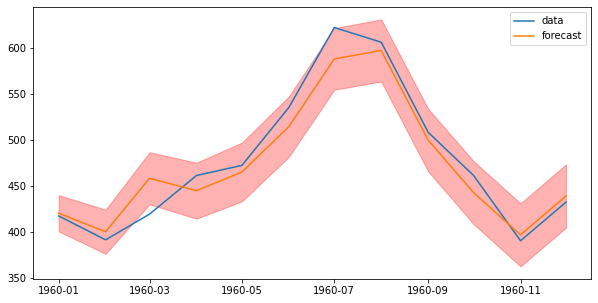

In [60]:
plot_fit_and_forecast(df=test, pred=test_pred, confint=confint, df_3=test);

In [55]:
train_pred = model.predict_in_sample(start=0, end=-1)

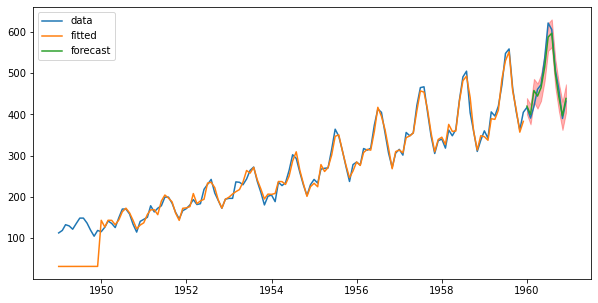

In [56]:
plot_fit_and_forecast(test, test_pred, confint, mode=1, df_2=train, pred_2=train_pred, df_3=df)

In [57]:
logmodel = pm.auto_arima(train["LogPassengers"], trace=True, suppress_warnings=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.306, Time=2.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.33 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=1.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.05 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.327, Time=2.32 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.89 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=4.91 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.715, Time=1.65 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=4.09 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.531, Time=1.56 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.69 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-440.519, Time=1.87 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.462, Time=3.72 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [58]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Tue, 09 Nov 2021   AIC                           -448.052
Time:                                      18:21:30   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.158      0.031       0.002       0.037
ar.L1          0.5999      0.083      7.271      0.000       0.438       0.762
ar.L2          0.2419      0.085      2.858      0.004       0.076       0.408
ma.S.L12      -0.5675      0.105     -5.427      0.000      -0.772      -0.363
sigma2         0.0012      0.000      8.199      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.09
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)

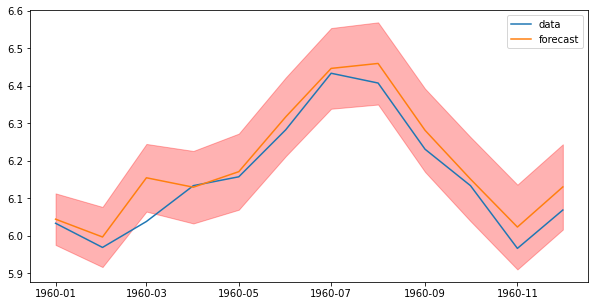

In [63]:
plot_fit_and_forecast(df=test, pred=test_pred_log, col="LogPassengers",confint=confint, df_3=test);

In [64]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

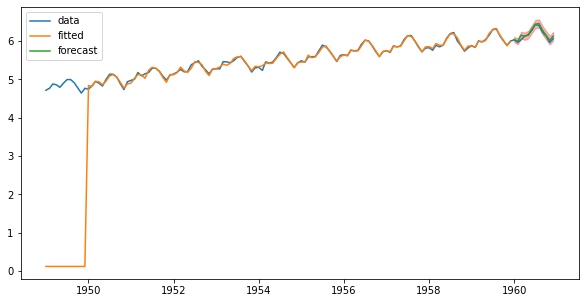

In [66]:
plot_fit_and_forecast(test, test_pred_log, confint, col="LogPassengers", mode=1, df_2=train, pred_2=train_pred_log, df_3=df)

In [72]:
print("Non-logged RMSE:", rmse(test["Passengers"], test_pred))
print("Logged RMSE    :", rmse(test["Passengers"], np.exp(test_pred_log)))

Non-logged RMSE: 18.536468737783885
Logged RMSE    : 23.037976359120712


In [90]:
stepwise=False
# stepwise=True
# test with both modes

model = pm.auto_arima(train["LogPassengers"], trace=True, suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14, stepwise=stepwise, seasonal=False, )

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.349, Time=0.49 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-245.861, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.403, Time=0.64 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.51 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-250.897, Time=0.82 sec
 ARIMA(5,1,0)(0,0,0)[0] i

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 226.856
Date:                Tue, 09 Nov 2021   AIC                           -423.712
Time:                        18:42:04   BIC                           -380.584
Sample:                             0   HQIC                          -406.187
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0061      0.006      1.062      0.288      -0.005       0.017
ar.L1          0.0389      0.089      0.438      0.661      -0.135       0.213
ar.L2         -0.0784      0.069     -1.129      0.259      -0.214       0.058
ar.L3         -0.0372      0.067     -0.551      0.582      -0.169       0.095
ar.L4         -0.1021      0.072     -1.413      0.158      -0.244       0.040
ar.L5          0.0127      0.065      0.194      0.846      -0.115       0.141
ar.L6         -0.0543      0.068     -0.800      0.424      -0.187       0.079
ar.L7         -0.0472      0.073     -0.645      0.519      -0.191       0.096
ar.L8         -0.1133      0.067     -1.683      0.092      -0.245       0.019
ar.L9          0.0106      0.078      0.137      0.891      -0.142       0.163
ar.L10        -0.0641      0.066     -0.968      0.333      -0.194       0.066
ar.L11        -0.0034      0.072     -0.047      0.963      -0.145       0.138
ar.L12         0.8045      0.064     12.653      0.000       0.680       0.929
ma.L1         -0.3517      0.126     -2.794      0.005      -0.598      -0.105
sigma2         0.0016      0.000      6.896      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.82   Prob(JB):                         0.28
Heteroskedasticity (H):               0.36   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

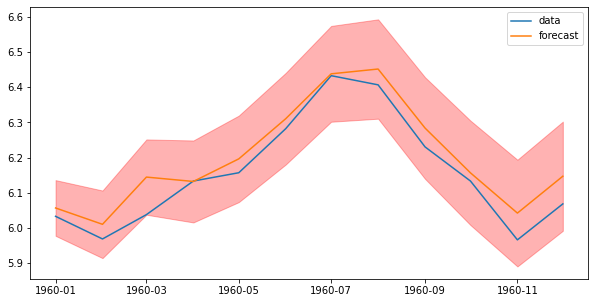

In [86]:
plot_fit_and_forecast(df=test, pred=test_pred, col="LogPassengers",confint=confint, df_3=test);

In [87]:
train_pred = model.predict_in_sample(start=1, end=-1)

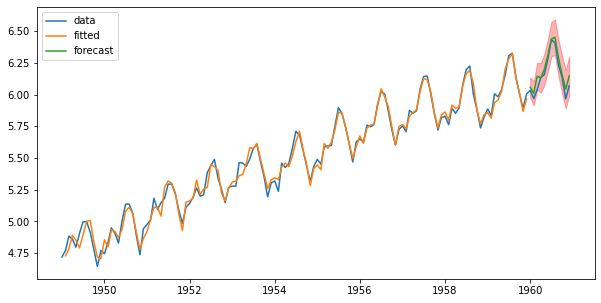

In [88]:
plot_fit_and_forecast(test, test_pred, confint, mode=1, col="LogPassengers",df_2=train[1:], pred_2=train_pred, df_3=df)

In [89]:
print("Logged RMSE    :", rmse(test["Passengers"], np.exp(test_pred)))

Logged RMSE    : 24.308790660720675
